In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np


In [3]:
image = cv2.imread('../img/example.jpg')

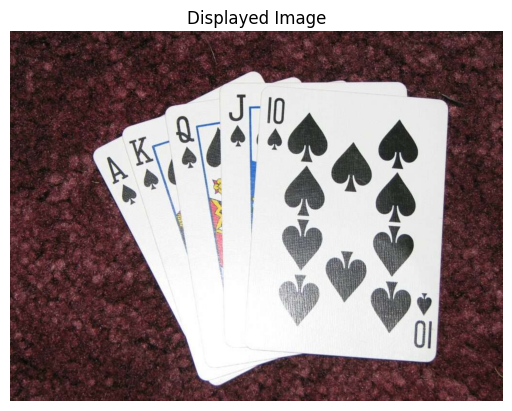

In [5]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.title('Displayed Image')
plt.axis('off')  # Turn off axis numbers
plt.show()

In [7]:
def warp_image(image, src_points, w, h):
    """
    Warps an image from src_points to a new dimension (w, h).

    :param image: Input image
    :param src_points: List of four source points (x, y) in the order 
                       top-left, top-right, bottom-left, bottom-right.
    :param w: Width of the output image
    :param h: Height of the output image
    :return: Warped image
    """
    # Destination points
    dst_points = np.float32([[0, 0], [w, 0], [0, h], [w, h]])

    # Compute the perspective transform matrix and warp the image
    matrix = cv2.getPerspectiveTransform(src_points, dst_points)
    warped_image = cv2.warpPerspective(image, matrix, (w, h))

    return warped_image

In [14]:
src_points = np.float32([
    [524, 112],  # Top-left point
    [913, 145],  # Top-right point
    [490, 650],  # Bottom-left point
    [881, 687]   # Bottom-right point
])

# Desired width and height
width, height = 600, 800

# Warp the image
warped = warp_image(image, src_points, width, height)



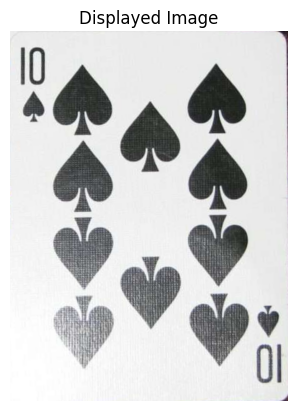

In [15]:
image_rgb = cv2.cvtColor(warped, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.title('Displayed Image')
plt.axis('off')  # Turn off axis numbers
plt.show()

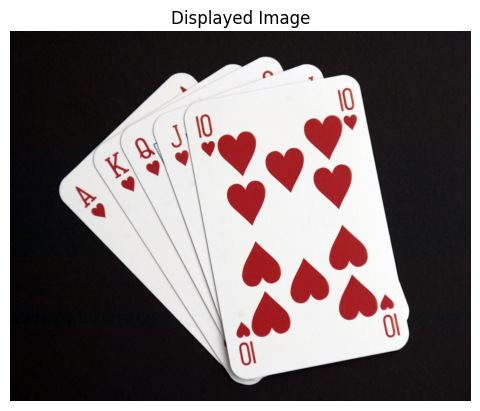

In [6]:
import cv2
import numpy as np
import requests

def read_image_from_url(url):
    # Send an HTTP GET request to the URL
    response = requests.get(url)
    
    # Raise an exception if the request was unsuccessful
    response.raise_for_status()

    # Convert the response content to a NumPy array
    image_array = np.frombuffer(response.content, dtype=np.uint8)

    # Decode the NumPy array to an OpenCV image
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

    # If needed, convert color from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    return image

# Example usage
url = 'https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Fe%2Fe2%2FA_studio_image_of_a_hand_of_playing_cards._MOD_45148377.jpg&f=1&nofb=1&ipt=982488faf2b7b347563830f58c00e7503ef6c18b387d23ae5d7bad3ab658b215&ipo=images'  # Replace with your image URL
image = read_image_from_url(url)
plt.imshow(image)
plt.title('Displayed Image')
plt.axis('off')  # Turn off axis numbers
plt.show()
